## Author: Jiacheng Lu

## Purpose: Hypothesis Analysis (SFO/LAX Data sets)

# Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import os
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Purpose for the analysis

### Analyze the SFO and LAX data sets and determine if either marketing campaign was successful in raising the average miles driven per Uber driver.

# Import the data

### SFO Data Acquisition
The actual path to downloadable SFO CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vQxzjUpXxGqdAstCrhhjZDsvpBTDiqzOqMiYrDf36jH_T1O84_adZMDIbEZqaJCx8DdRkvhiSd168GF/pub?gid=1943758091&single=true&output=csv

### LAX Data Acquisition 

The actual path to downloadable LAX CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vSFPBhQsFz1o5tMF-HeF7x2O39QbNj1MoK4LnQhlUBs40JIyw5H3dyFRNu7q3sYdJH0jPwOldv4YDCa/pub?gid=1353518873&single=true&output=csv

In [0]:
# Read data from google sheet
sfo_data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQxzjUpXxGqdAstCrhhjZDsvpBTDiqzOqMiYrDf36jH_T1O84_adZMDIbEZqaJCx8DdRkvhiSd168GF/pub?gid=1943758091&single=true&output=csv'
sfo_df = pd.read_csv(sfo_data_path)

# Read data from google sheet
lax_data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSFPBhQsFz1o5tMF-HeF7x2O39QbNj1MoK4LnQhlUBs40JIyw5H3dyFRNu7q3sYdJH0jPwOldv4YDCa/pub?gid=1353518873&single=true&output=csv'
lax_df = pd.read_csv(lax_data_path)

# Hypothesis I - SFO data set




In [0]:
# Explore the data
sfo_df.head()

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,61.633518,0
1,09/15/2019,69.063563,0
2,09/16/2019,69.454577,0
3,09/17/2019,60.217145,0
4,09/18/2019,57.522406,0


### Column Definitions
*   Date - The date that the observation was recorded.
*   SFO - Avg. Daily Miles Driven Per Hour - The miles driven on average per hour.
*   Marketing_Campaign - A binary field that is set to either 1 for when the marketing campaign were active or 0 for when the marketing campaign were deactivated.


In [0]:
list(sfo_df)

['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

### Test Setup
*   The Null Hypothesis is that the average daily miles driven per hour when the marketing campaign was in service is the same as the average daily miles driven per hour when the marketing campaign was not in action.
*   The Alternate Hypothesis is that the average daily miles driven per hour when the marketing campaign was in service is greater than the average daily miles driven per hour when the marketing campaign was not in action.
*   The p-value will be set to .05

### SFO Quantitative Variable Overview

In [0]:
sfo_df.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,60.936407,0.281553
std,32.530509,0.451956
min,3.748316,0.000000
25%,49.473834,0.000000
50%,68.766828,0.000000
75%,79.614043,1.000000
max,128.413814,1.000000


### Explore the distribution of SFO - Avg. Daily Miles Driven Per Hour variables

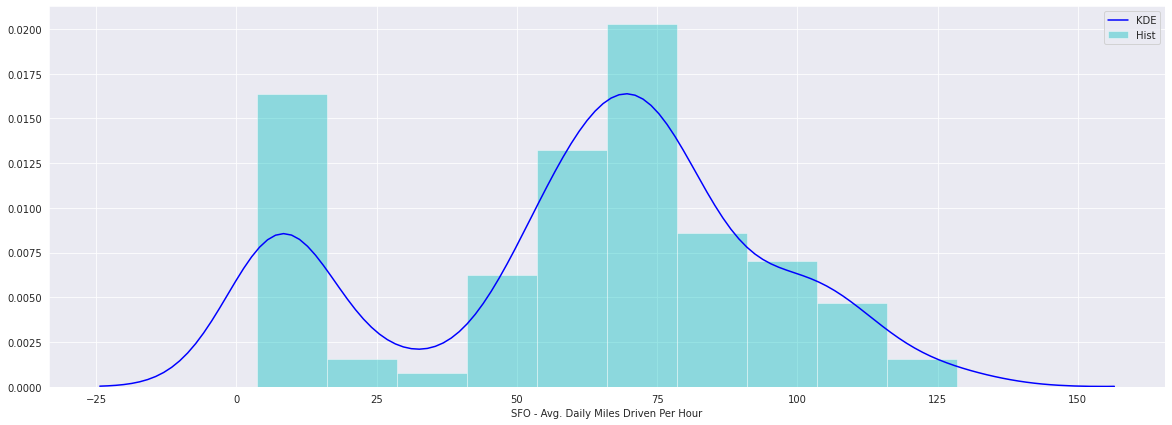

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,7))
ax = sns.distplot(sfo_df['SFO - Avg. Daily Miles Driven Per Hour'], hist_kws={'color':'c','label':'Hist'},
                     kde_kws={'color':'b','label':'KDE'})

### Create a dataframe that has the outliers removed
Trimming off the outliers of the dataframe

In [0]:
starting_percentile0 = sfo_df['SFO - Avg. Daily Miles Driven Per Hour'].quantile(.01)
ending_percentile0 = sfo_df['SFO - Avg. Daily Miles Driven Per Hour'].quantile(.99)
print('Starting percentile: ', starting_percentile0)
print('Ending percentile: ', ending_percentile0)

Starting percentile:  3.9176563955400003
Ending percentile:  122.97143537000004


Create a dataframe that has the outliers removed

In [0]:
sfo_df_trimmed = sfo_df.loc[((sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] > starting_percentile0) & (sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] < ending_percentile0))]

### Replot the graph with outliers removed

Text(0.5, 1.0, 'Distribution of SFO - Avg. Daily Miles Driven Per Hour with outliers removed')

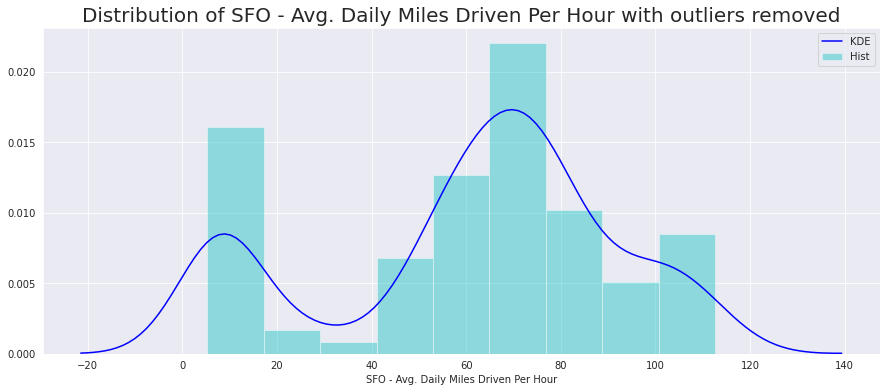

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'], hist_kws={'color':'c','label':'Hist'},
                     kde_kws={'color':'b','label':'KDE'})
ax.set_title('Distribution of SFO - Avg. Daily Miles Driven Per Hour with outliers removed', fontsize=20)

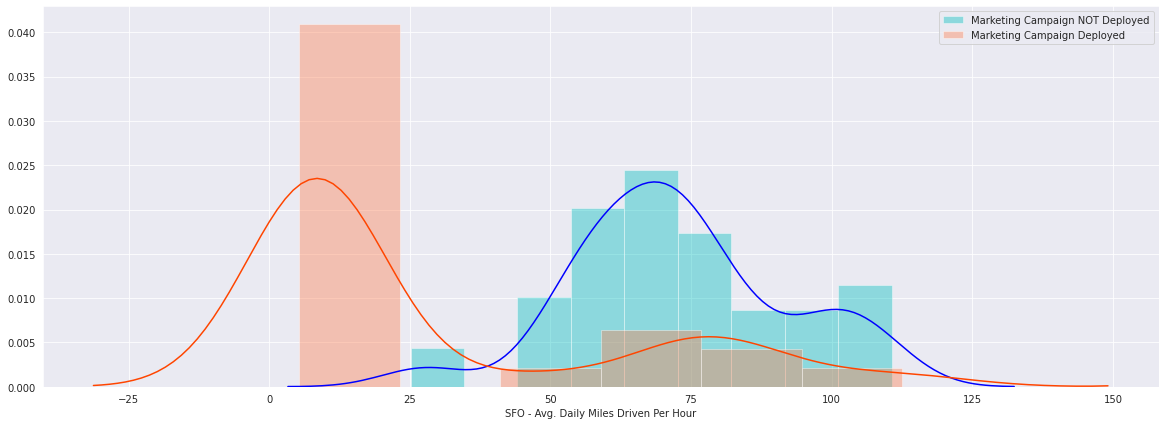

In [0]:
data0 = sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_df_trimmed['Marketing_Campaign']==0]
data1 = sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_df_trimmed['Marketing_Campaign']==1]

sns.set_style('darkgrid')
plt.figure(figsize=(20,7))
ax = sns.distplot(data0, hist=True, hist_kws={'color':'c'}, kde_kws={'color':'b'})
ax = sns.distplot(data1, hist=True, hist_kws={'color':'coral'}, kde_kws={'color':'orangered'})
plt.legend(['Marketing Campaign NOT Deployed','Marketing Campaign Deployed'])

In [0]:
data0

0       61.633518
1       69.063563
2       69.454577
3       60.217145
4       57.522406
          ...    
69      57.561429
70     102.354018
71      50.456930
101    106.059126
102    109.921783
Name: SFO - Avg. Daily Miles Driven Per Hour, Length: 73, dtype: float64

In [0]:
#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=70.497, p=0.000
Different distributions (reject H0)


# Summary

*   From the analysis above, we can conclude that the marketing campaign will influence the average daily mile driven per hour for per uber driver. (Reject H0 hypothesis)
*   Initially, we supposed that the mile driven will increase when the marketing campaign is in action. (H1)
*   However, from the graph, it shows that the mile driven decreased when the marketing campaign is hold. The outcome is opposite to our H1 hypothesis.
*   The reasons to the result may be as follows (and vice versa):
  1. When the marketing campaign was hold, the weather may be bad so people prefer to stay inside more.
  2. When the marketing campaign was hold, the oil price may be low, people prefer to drive by themselves instead of taking uber.
  3. When the marketing campaign was hold, the competitors(ex. Lyft) may have the better marketing campaign, so people will prefer the other more.

There are still many other factors that can influence the result. We can conclude that the campaign will influence the average miles driven; however, the tendency for the miles driven can be influenced by external factors(ex. weather, economics, strategy...). The outcome is not always as what we have expected.



# Hypothesis II - LAX data set

Explore LAX data

In [0]:
# Explore the data
lax_df.head()

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,225.539221,0
1,09/15/2019,94.976246,0
2,09/16/2019,42.465008,0
3,09/17/2019,137.486583,0
4,09/18/2019,128.003456,0


### Column Definitions
*   Date - The date that the observation was recorded.
*   LAX - Avg. Daily Miles Driven Per Hour - The miles driven on average per hour.
*   Marketing_Campaign - A binary field that is set to either 1 for when the marketing campaign were active or 0 for when the marketing campaign were deactivated.


In [0]:
list(lax_df)

['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

### Test Setup
*   The Null Hypothesis is that the average daily miles driven per hour when the marketing campaign was in service is the same as the average daily miles driven per hour when the marketing campaign was not in action.
*   The Alternate Hypothesis is that the average daily miles driven per hour when the marketing campaign was in service is greater than the average daily miles driven per hour when the marketing campaign was not in action.
*   The p-value will be set to .05

### LAX Quantitative Variable Overview

The min value of LAX - Avg. Daily Miles Driven Per Hour is negative number, which seems werid and warrented and need more evaluation.

In [0]:
lax_df.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,126.769629,0.291262
std,57.910277,0.456566
min,-23.992631,0.000000
25%,92.758046,0.000000
50%,122.668549,0.000000
75%,161.724918,1.000000
max,269.381218,1.000000


### Explore the distribution of LAX - Avg. Daily Miles Driven Per Hour variable

Text(0.5, 1.0, 'Distribution of LAX - Avg. Daily Miles Driven Per Hour')

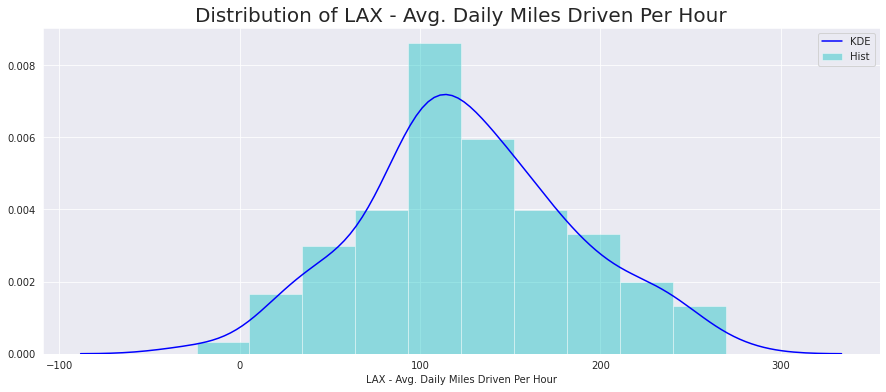

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(lax_df['LAX - Avg. Daily Miles Driven Per Hour'], hist_kws={'color':'c','label':'Hist'},
                     kde_kws={'color':'b','label':'KDE'})
ax.set_title('Distribution of LAX - Avg. Daily Miles Driven Per Hour', fontsize=20)

### Create a dataframe that has the outliers removed

Trimming off the outliers of the dataframe


In [0]:
starting_percentile = lax_df['LAX - Avg. Daily Miles Driven Per Hour'].quantile(.01)
ending_percentile = lax_df['LAX - Avg. Daily Miles Driven Per Hour'].quantile(.99)
print("Starting percentile: ", starting_percentile)
print("Ending percentile: ", ending_percentile)

Starting percentile:  17.879818054799998
Ending percentile:  246.906784114


Create a dataframe that has the outliers removed

In [0]:
lax_df_trimmed = lax_df.loc[((lax_df['LAX - Avg. Daily Miles Driven Per Hour'] > starting_percentile) & (lax_df['LAX - Avg. Daily Miles Driven Per Hour'] < ending_percentile))]

### Replot the graph with outliers removed

Text(0.5, 1.0, 'Distribution of LAX - Avg. Daily Miles Driven Per Hour with outliers removed')

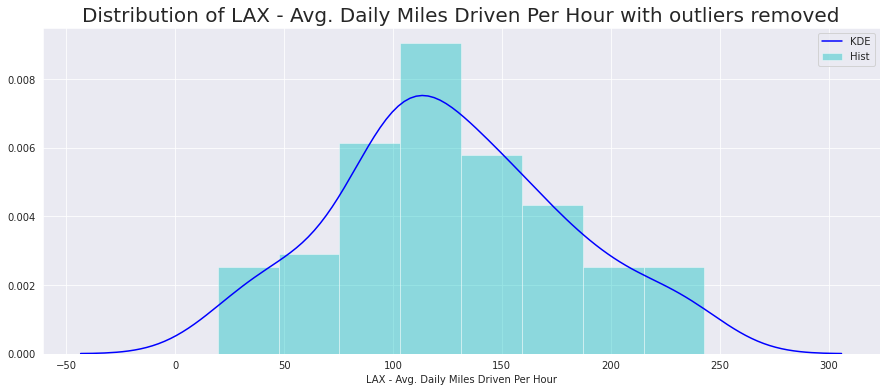

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'], hist_kws={'color':'c','label':'Hist'},
                     kde_kws={'color':'b','label':'KDE'})
ax.set_title('Distribution of LAX - Avg. Daily Miles Driven Per Hour with outliers removed', fontsize=20)

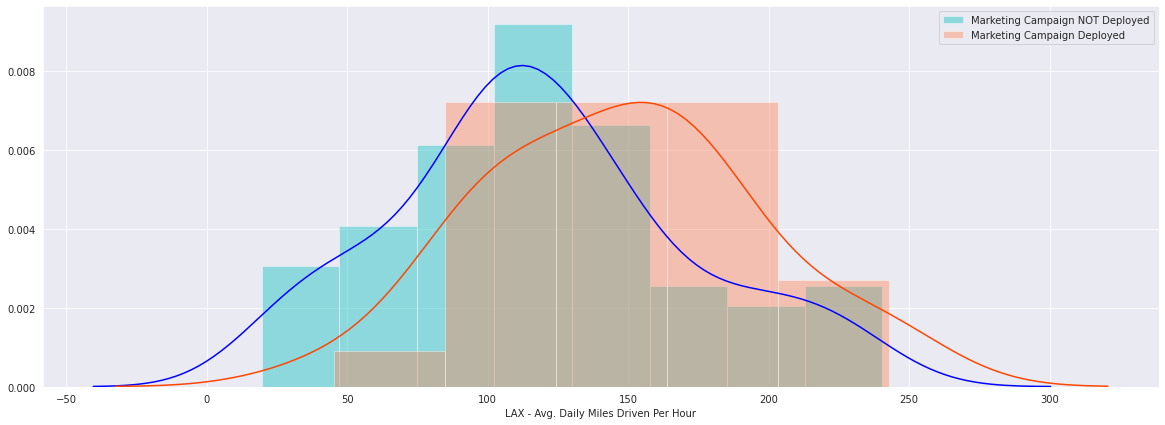

In [0]:
data2 = lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_df_trimmed['Marketing_Campaign']==0]
data3 = lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_df_trimmed['Marketing_Campaign']==1]

sns.set_style('darkgrid')
plt.figure(figsize=(20,7))
ax = sns.distplot(data2, hist=True, hist_kws={'color':'c'}, kde_kws={'color':'b'})
ax = sns.distplot(data3, hist=True, hist_kws={'color':'coral'}, kde_kws={'color':'orangered'})
plt.legend(['Marketing Campaign NOT Deployed','Marketing Campaign Deployed'])

In [0]:
data2

0      225.539221
1       94.976246
2       42.465008
3      137.486583
4      128.003456
          ...    
68      23.036315
69     103.478113
70     214.644502
101    145.146456
102    222.508737
Name: LAX - Avg. Daily Miles Driven Per Hour, Length: 71, dtype: float64

In [0]:
#compare samples
stat, p = f_oneway(data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=6.344, p=0.013
Different distributions (reject H0)


# Summary

*   From the analysis above, we can conclude that the marketing campaign will influence the average daily mile driven per hour for per uber driver. (Reject H0 hypothesis)
*   Initially, we supposed that the mile driven will increase when the marketing campaign is in action. (H1)
*   From the graph, we can confirm that when the campaign was hold, the mile driven per hour for uber driver will increase. (Correspond to H1 hypothesis)
*   The reasons to the result may be as follows:
  1. When the marketing campaign was hold, the weather may be good and people prefer to go out.
  2. When the marketing campaign was hold, the oil price may be high, people prefer taking uber.
  3. When the marketing campaign was hold, the competitors(ex. Lyft) may not have marketing campaign, so people will prefer to enjoy the one that have promotion.
  4. When the marketing campaign was hold, there may be some other campaigns in the state at the same time, people will come so the chance to take uber will increase.  


# Conclusion
There are still many other factors that can influence the result. We can conclude that the campaign will influence the average miles driven; however, the tendency for the miles driven can be influenced by external factors(ex. weather, economics, strategy...). The mile may increase or decrease because of the marketing campaign. Sometimes, the outcome may not be what we have expected. Similiar to the SFO data we have just explored. It depends on the situation, so we need to take care of other factors while we are conducting the analysis. The more we explore, the more opportunity we can approach correct hypothesis.


